In [1]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [10]:
import seaborn as sns

In [4]:
wine_df = pd.read_csv('wine.xls', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [5]:
wine_df.shape

(178, 14)

In [15]:
wine_df.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


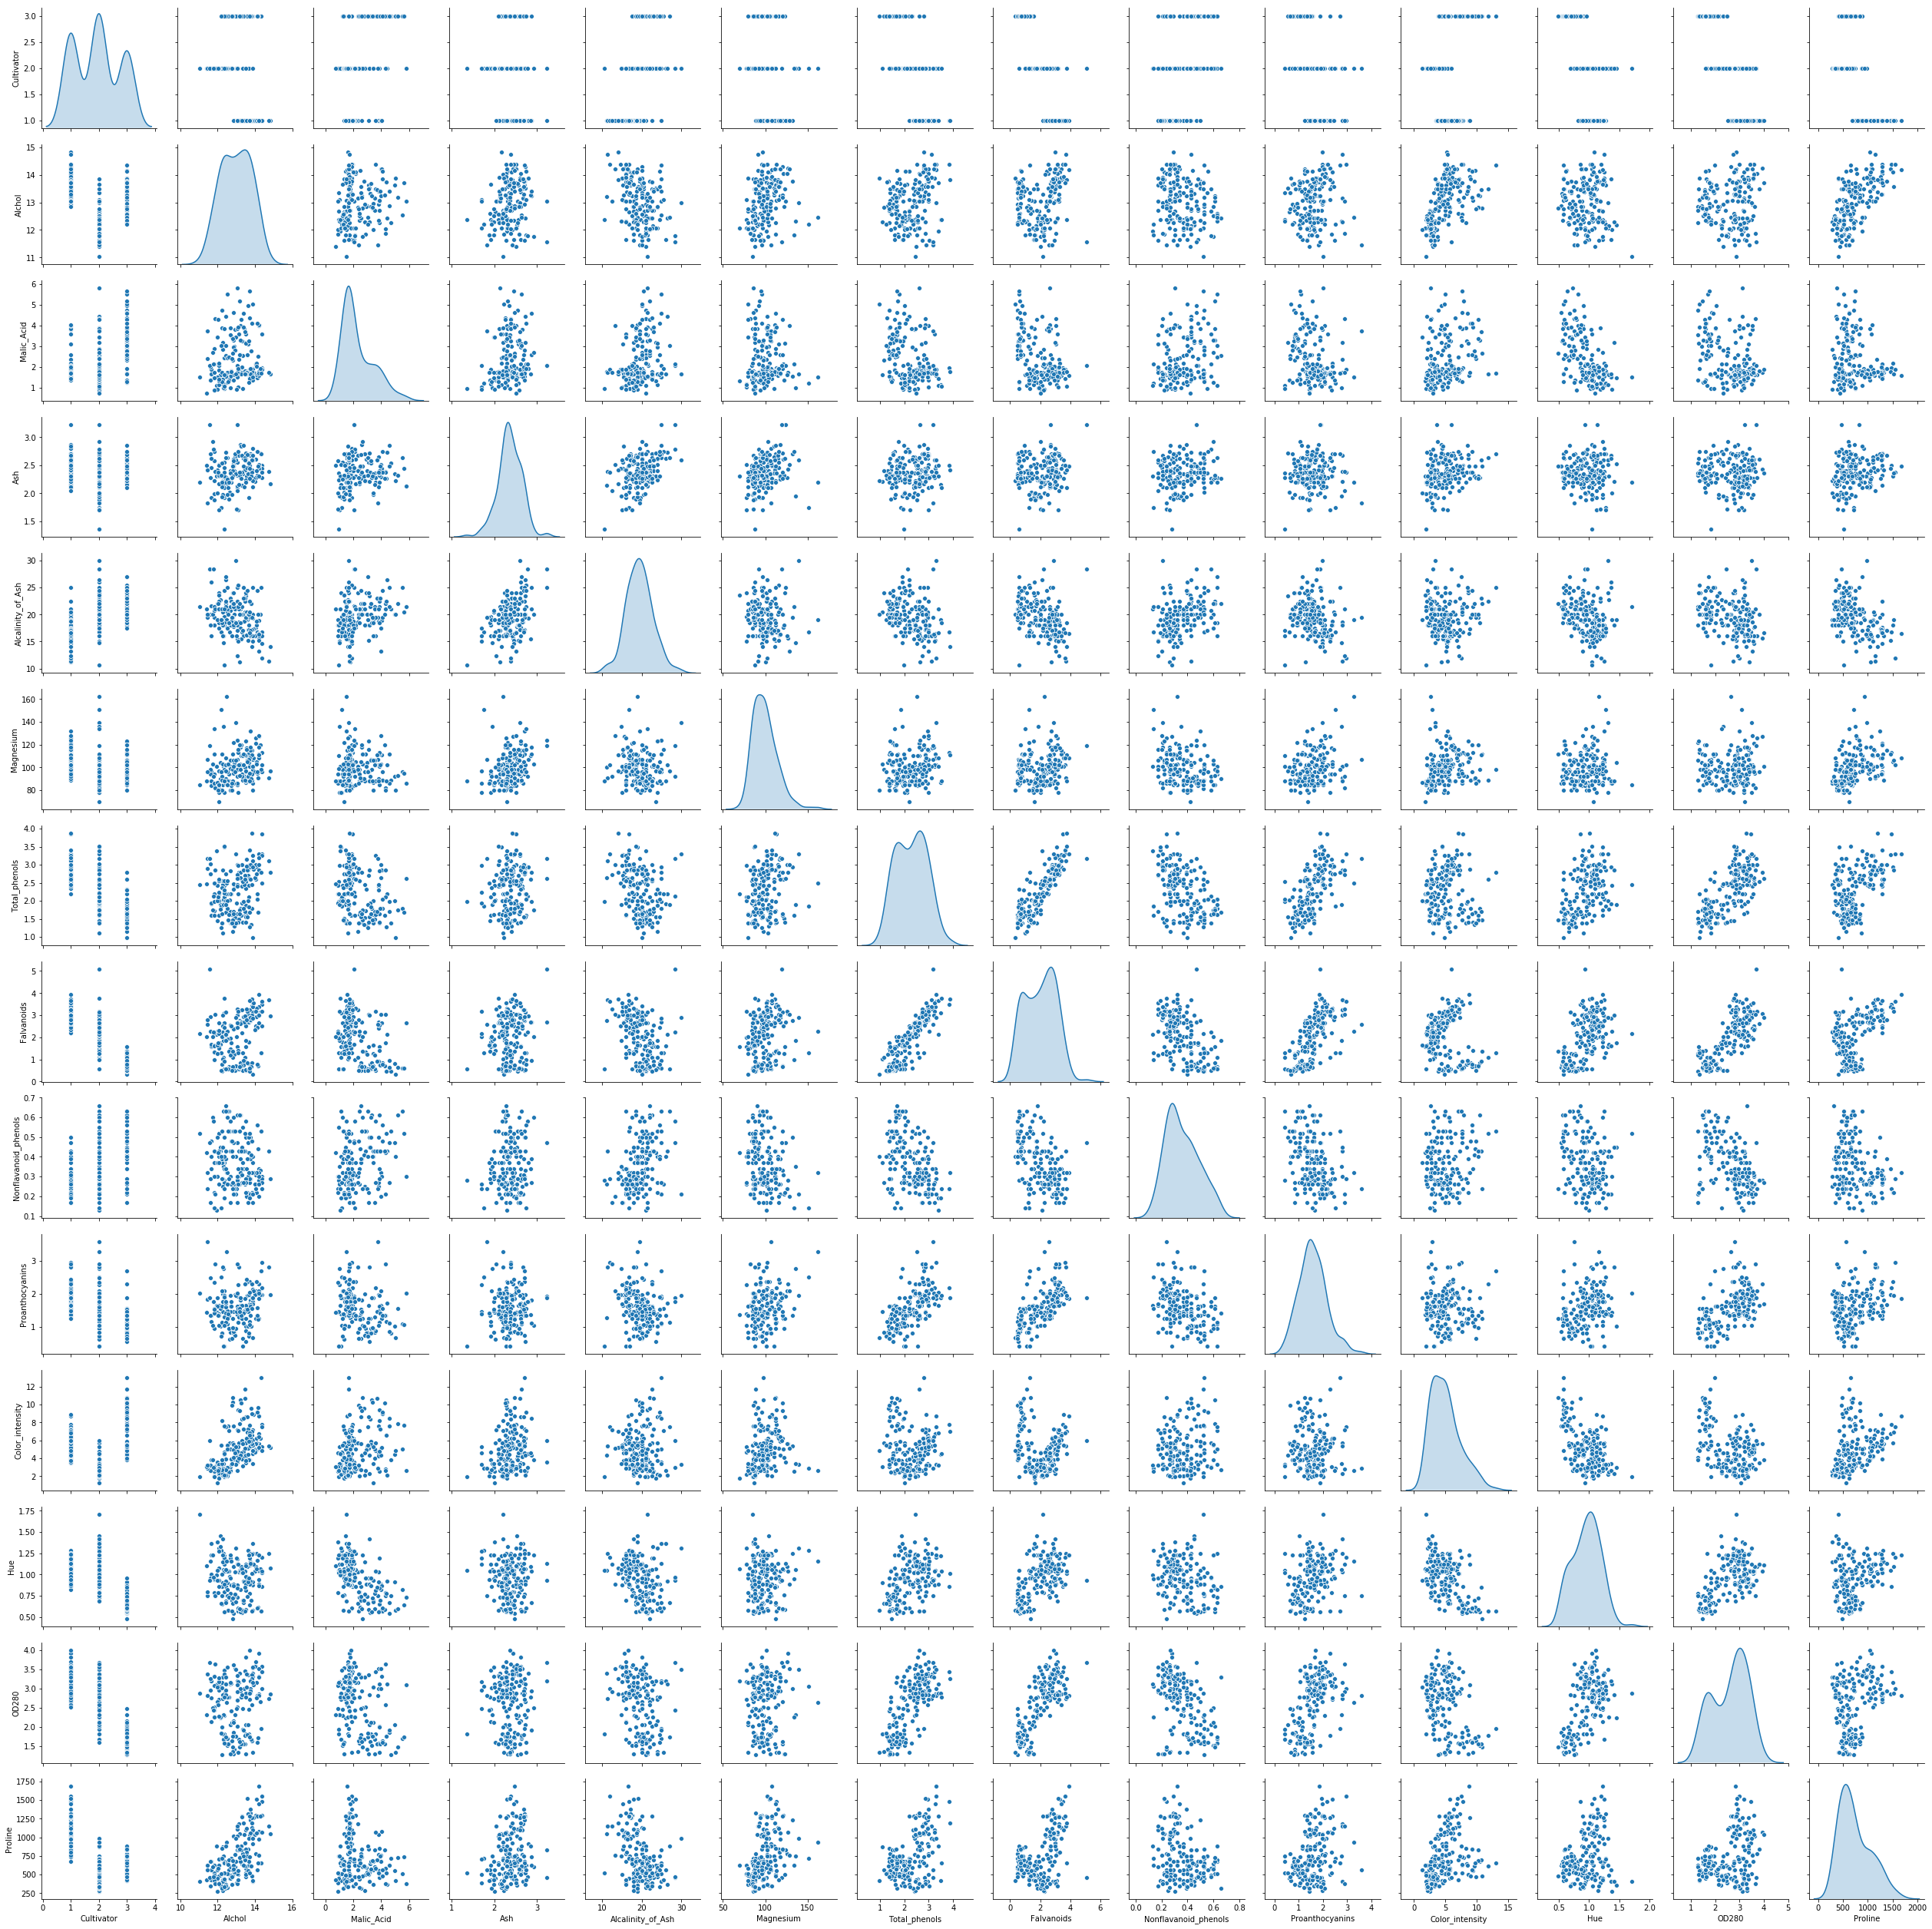

In [4]:
import seaborn as sns
sns.pairplot(wine_df,diag_kind='kde')

In [16]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")
X_std = StandardScaler().fit_transform(X)
train_set, test_set, train_labels, test_labels = train_test_split(X_std, y, test_size=0.30, random_state=1)

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
y.value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [19]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_predict=dt_model.predict(test_set)

In [21]:
acc=metrics.accuracy_score(test_labels,y_predict)
acc

0.9629629629629629

In [23]:
cm=metrics.confusion_matrix(test_labels,y_predict)
cm

array([[22,  1,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]], dtype=int64)

In [24]:
cr=metrics.classification_report(test_labels,y_predict)
print(cr)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        19
           3       1.00      1.00      1.00        12

   micro avg       0.96      0.96      0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



In [25]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 

In [26]:
cov_matrix.shape

(13, 13)

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


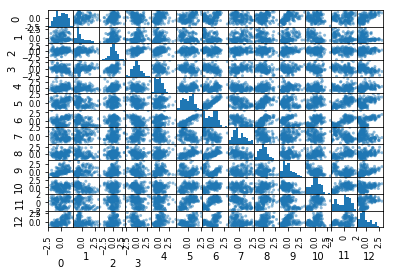

In [27]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

In [28]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [29]:
eig_vals

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

In [31]:
eig_vecs

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

In [32]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.

In [33]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [36]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [37]:
eigen_pairs

[(4.732436977583595,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.5110809296451233,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464692,
  array([-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
          0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
          0.08522192,  0.16600459, -0.12674592])),
 (0.9241658668248756,
  array([ 0.0178563 , -0.53689028,  0.21417556, -0.06085941,  0.35179658,
         -0.19806835, -0.15229479,  0.20330102, -0.39905653, -0.06592568,
          0.42777141, -0.18412074,  0.23207086])),
 (0.8580486765371118,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841,

In [38]:
eigen_pairs_sorted

[(4.732436977583595,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.5110809296451233,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464692,
  array([-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
          0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
          0.08522192,  0.16600459, -0.12674592])),
 (0.9241658668248756,
  array([ 0.0178563 , -0.53689028,  0.21417556, -0.06085941,  0.35179658,
         -0.19806835, -0.15229479,  0.20330102, -0.39905653, -0.06592568,
          0.42777141, -0.18412074,  0.23207086])),
 (0.8580486765371118,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841,

In [46]:
type(eig_vals)

numpy.ndarray

In [42]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


In [41]:
wine_df.shape

(178, 13)

In [49]:
tot=sum(eig_vals)
tot

13.073446327683632

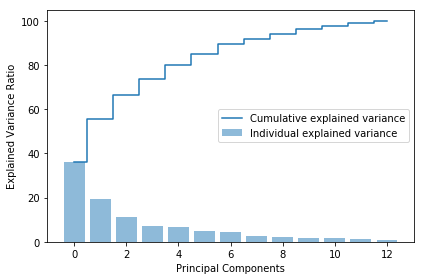

In [50]:
plt.figure(figsize=(6 , 4))
plt.bar(range(13), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(13), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

([], <a list of 0 Text yticklabel objects>)

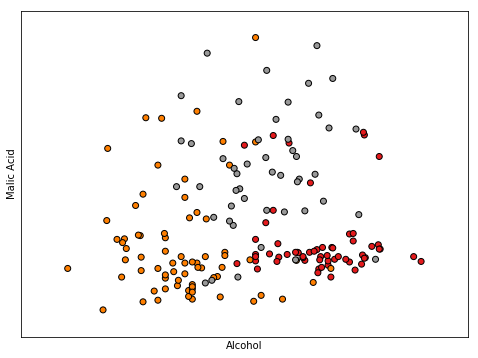

In [52]:
## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



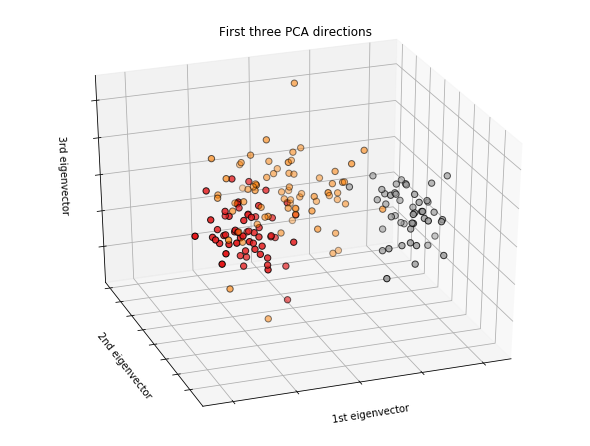

In [53]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_std)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [54]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]
#Project data onto 2d 




In [55]:
eigvectors_sort[:2]

[array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
        -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
        -0.29671456, -0.37616741, -0.28675223]),
 array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283])]

In [120]:
# Keep the first two principal components 
# P_reduce is 8 x 2 matrix
P_reduce = np.array(eigvectors_sort[0:11]).transpose()

In [121]:
P_reduce.shape

(13, 11)

In [122]:
# Let's project data onto 2D space
Proj_data_2D = np.dot(X_std,P_reduce)
Proj_data_2D.shape

(178, 11)

In [123]:
xtrain, xtest, ytrain, ytest = train_test_split(Proj_data_2D, y, test_size=0.30, random_state=1)


In [124]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model2.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [125]:
y_predict2=dt_model2.predict(xtest)

In [126]:
acc2=metrics.accuracy_score(ytest,y_predict2)
acc2

0.8888888888888888

In [127]:
cm2=metrics.confusion_matrix(ytest,y_predict2)
print(cm2)

[[22  1  0]
 [ 2 17  0]
 [ 0  3  9]]


In [128]:
cr2=metrics.classification_report(ytest,y_predict2)
print(cr2)

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        23
           2       0.81      0.89      0.85        19
           3       1.00      0.75      0.86        12

   micro avg       0.89      0.89      0.89        54
   macro avg       0.91      0.87      0.88        54
weighted avg       0.90      0.89      0.89        54



# MODEL COMPARISION

In [129]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [130]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# k- fold cross validation

LR: 0.972222 (0.037268)
KNN: 0.944444 (0.060858)
CART: 0.860131 (0.114153)
NB: 0.961111 (0.055833)
SVM: 0.960784 (0.043527)


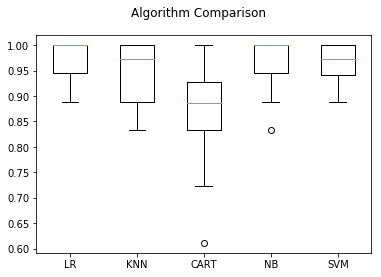

In [131]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X_std, y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145:

LR: 0.985775 (0.022972)
KNN: 0.961465 (0.047100)
CART: 0.953130 (0.035441)
NB: 0.981001 (0.031165)
SVM: 0.974719 (0.032948)


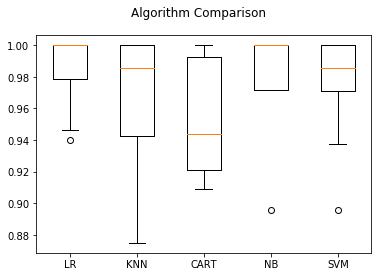

In [132]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, Proj_data_2D, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Comparing Clustering Results

In [86]:
from sklearn.cluster import KMeans

In [87]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(X_std)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2314.000000
1,2,1659.007967
2,3,1277.928489
3,4,1175.501002
4,5,1114.097174
5,6,1049.077467
6,7,994.398912
7,8,932.313441
8,9,892.124028


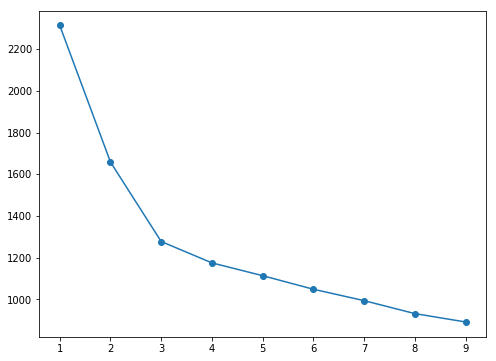

In [133]:
# Elbow plot

plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [134]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(X_std)
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns=list(X) )
centroid_df

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
2,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [178]:
for i in centroid_df:
    print(i)

Alchol
Malic_Acid
Ash
Alcalinity_of_Ash
Magnesium
Total_phenols
Falvanoids
Nonflavanoid_phenols
Proanthocyanins
Color_intensity
Hue
OD280
Proline


In [172]:
s.sort_values('1st diff')

,1st diff,2nd diff
Color_intensity,-0.730851,-0.039625
Ash,-0.129811,0.307618
Alchol,-0.090840,0.761164
Malic_Acid,-0.090232,-0.477506
Hue,0.012180,-0.702985
Magnesium,0.085875,0.416239
Proline,0.371339,0.346758
Alcalinity_of_Ash,0.439589,-0.353766
OD280,0.508483,-1.021647
Proanthocyanins,0.522021,-0.721441


In [162]:
a=np.abs(centroid_df.iloc[0])-np.abs(centroid_df.iloc[1])

In [164]:
b=np.abs(centroid_df.iloc[1])-np.abs(centroid_df.iloc[2])

In [165]:
a

Alchol                 -0.090840
Malic_Acid             -0.090232
Ash                    -0.129811
Alcalinity_of_Ash       0.439589
Magnesium               0.085875
Total_phenols           0.809255
Falvanoids              0.957007
Nonflavanoid_phenols    0.528556
Proanthocyanins         0.522021
Color_intensity        -0.730851
Hue                     0.012180
OD280                   0.508483
Proline                 0.371339
dtype: float64

In [166]:
s=pd.DataFrame({'1st diff':a,'2nd diff':b})

In [167]:
s

,1st diff,2nd diff
Alchol,-0.090840,0.761164
Malic_Acid,-0.090232,-0.477506
Ash,-0.129811,0.307618
Alcalinity_of_Ash,0.439589,-0.353766
Magnesium,0.085875,0.416239
Total_phenols,0.809255,-0.903348
Falvanoids,0.957007,-1.194435
Nonflavanoid_phenols,0.528556,-0.692530
Proanthocyanins,0.522021,-0.721441
Color_intensity,-0.730851,-0.039625


Text(0.5,0.92,'3D plot of KMeans Clustering')

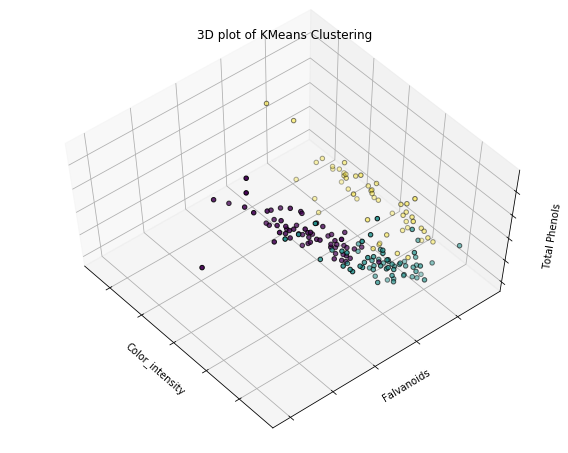

In [0]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=60, azim=140)
kmeans.fit(X_std)
labels = kmeans.labels_
ax.scatter(X_std[:, 9], X_std[:, 6], X_std[:, 5],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Color_intensity')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Total Phenols')
ax.set_title('3D plot of KMeans Clustering')

# Building clustering Model with PCA Features

In [0]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(Proj_data_2D)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2085.654718
1,2,1430.889178
2,3,1050.512814
3,4,950.730992
4,5,886.274814
5,6,818.990392
6,7,773.767480
7,8,717.791204
8,9,675.863225


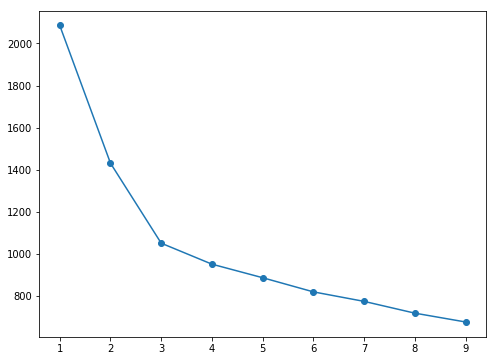

In [0]:
# Elbow plot

plt.figure(figsize=(8,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
kmeans2 = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans2.fit(Proj_data_2D)
centroids2=kmeans2.cluster_centers_
centroid_df2 = pd.DataFrame(centroids2)
centroid_df2

,0,1,2,3,4,5,6,7
0,0.036957,-1.772239,-0.186139,0.080240,0.070878,-0.129806,0.002327,0.008620
1,-2.276194,0.932054,-0.001528,-0.135498,-0.134912,0.218283,-0.052110,-0.050619
2,2.720036,1.125651,0.239093,0.062457,0.073676,-0.099925,0.060383,0.050551


Text(0.5,0.92,'3D plot of KMeans Clustering')

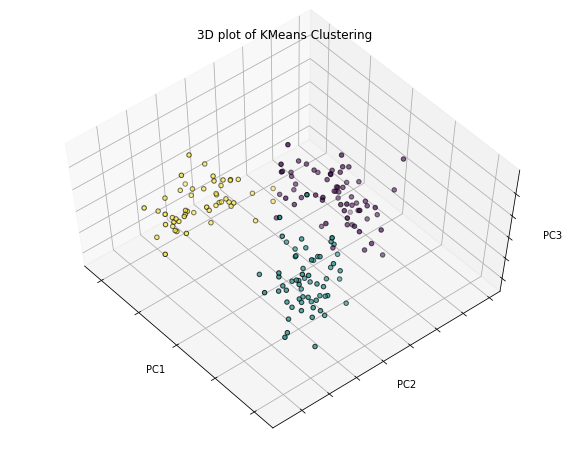

In [0]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=60, azim=140)
kmeans.fit(Proj_data_2D)
labels = kmeans.labels_
ax.scatter(Proj_data_2D[:, 0], Proj_data_2D[:, 1], Proj_data_2D[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D plot of KMeans Clustering')